In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [18]:
df_ol_shop = pd.read_csv('./Data/online_shoppers_intention.csv')

df_ol_shop.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
10638,12,152.75,6,1024.25,127,3247.644636,0.008845,0.017026,33.853391,0.0,Nov,3,1,1,2,Returning_Visitor,True,True
6440,0,0.00,0,0.00,2,30.400000,0.000000,0.066667,21.478995,0.0,Oct,1,8,6,20,Returning_Visitor,True,True
12240,1,8.00,0,0.00,6,189.750000,0.000000,0.019048,0.000000,0.0,Nov,1,1,7,2,Returning_Visitor,False,False
5533,6,85.20,0,0.00,11,203.000000,0.000000,0.000000,0.000000,0.0,Nov,2,2,5,2,Returning_Visitor,False,False
4110,0,0.00,0,0.00,41,647.816667,0.012500,0.026667,0.000000,0.4,May,2,2,6,1,Returning_Visitor,False,False


### 1. Data Cleansing

#### A. Missing Handle Value


In [19]:
df_ol_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [20]:
# Check missing value foreach column 

df_ol_shop.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

##### Tidak terdapat missing value, sehingga tidak perlu handdling missing value.

#### B. Handle duplicated data

In [25]:
# Check total duplicate

df_ol_shop.duplicated().sum()

125

In [45]:
# Copy for assigning df_ol_shop
df_ol_shop_2 = df_ol_shop.copy()

# Drop Duplicate
df_ol_shop_2 = df_ol_shop_2.drop_duplicates(ignore_index=True)

df_ol_shop_2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12201,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12202,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12203,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [24]:
# Check after delete duplicate data 

df_ol_shop_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

##### Menghapus data duplicates

#### C. Handle outliers

In [137]:
# pengelompokan kolom berdasarkan jenisnya

nums = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated','ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

cats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 'VisitorType', 'Weekend', 'Revenue']

In [30]:
df_ol_shop_2[nums].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [34]:
# let get each columns unique value and there values of int64 and bool
for col in df_ol_shop_2.columns:
    print("{} have {} unique values: {}".format(col, df_ol_shop_2[col].nunique(), df_ol_shop_2[col].dtypes))
    if (df_ol_shop_2[col].dtypes == 'int64' or df_ol_shop_2[col].dtypes == 'float64' or df_ol_shop_2[col].dtypes == 'bool'):
        print("{} values: {}".format(col,df_ol_shop_2[col].unique()))

Administrative have 27 unique values: int64
Administrative values: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Administrative_Duration have 3335 unique values: float64
Administrative_Duration values: [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
Informational have 17 unique values: int64
Informational values: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Informational_Duration have 1258 unique values: float64
Informational_Duration values: [  0.   120.    16.   ... 547.75 368.25 211.25]
ProductRelated have 311 unique values: int64
ProductRelated values: [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137

In [47]:
z_scores = np.abs(stats.zscore(df_ol_shop_2[nums]))

z_scores

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0.702302,0.460019,0.398824,0.246257,0.696218,0.628793,3.969402,3.434394,0.318962,0.31024
1,0.702302,0.460019,0.398824,0.246257,0.673793,0.595451,0.450137,1.268054,0.318962,0.31024
2,0.702302,0.460019,0.398824,0.246257,0.696218,0.628793,3.969402,3.434394,0.318962,0.31024
3,0.702302,0.460019,0.398824,0.246257,0.673793,0.627404,0.654748,2.134590,0.318962,0.31024
4,0.702302,0.460019,0.398824,0.246257,0.494387,0.301889,0.008183,0.184884,0.318962,0.31024
...,...,...,...,...,...,...,...,...,...,...
12200,0.198517,0.356953,0.398824,0.246257,0.469915,0.300496,0.292296,0.269384,0.337328,0.31024
12201,0.702302,0.460019,0.398824,0.246257,0.606516,0.386155,0.450137,0.436133,0.318962,0.31024
12202,0.702302,0.460019,0.398824,0.246257,0.584090,0.532806,1.391338,0.979209,0.318962,0.31024
12203,0.498791,0.037447,0.398824,0.246257,0.382259,0.448540,0.450137,0.442214,0.318962,0.31024


In [53]:
def getZScore(data):
    # print(data)
    # print(np.array(data))
    max_zscore = np.array(data).max()
    print(max_zscore)

    return max_zscore

In [54]:
df_ol_shop_2['z_scores'] = z_scores.apply(lambda x: getZScore(x), axis=1)

df_ol_shop_2

[0.70230237 0.46001931 0.3988242  0.24625723 0.69621817 0.62879299
 3.96940208 3.4343938  0.31896229 0.31023958]
3.9694020830749572
[0.70230237 0.46001931 0.3988242  0.24625723 0.67379254 0.59545137
 0.45013707 1.26805406 0.31896229 0.31023958]
1.2680540610638693
[0.70230237 0.46001931 0.3988242  0.24625723 0.69621817 0.62879299
 3.96940208 3.4343938  0.31896229 0.31023958]
3.9694020830749572
[0.70230237 0.46001931 0.3988242  0.24625723 0.67379254 0.62740376
 0.65474772 2.13458996 0.31896229 0.31023958]
2.1345899576198506
[0.70230237 0.46001931 0.3988242  0.24625723 0.49438744 0.30188882
 0.00818316 0.18488419 0.31896229 0.31023958]
0.7023023701245499
[0.70230237 0.46001931 0.3988242  0.24625723 0.29255672 0.54845184
 0.10122608 0.36620222 0.31896229 0.31023958]
0.7023023701245499
[0.70230237 0.46001931 0.3988242  0.24625723 0.69621817 0.62879299
 3.96940208 3.4343938  0.31896229 1.69318587]
3.9694020830749572
[0.40202911 0.46001931 0.3988242  0.24625723 0.71864381 0.62879299
 3.969402

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,z_scores
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,3.969402
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,1.268054
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,3.969402
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,2.134590
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0.702302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False,0.469915
12201,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False,0.702302
12202,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False,1.391338
12203,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False,0.498791


In [59]:
df_ol_shop_2_no_outlier = df_ol_shop_2[df_ol_shop_2['z_scores'] <= 3]
df_ol_shop_2_no_outlier

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,z_scores
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,1.268054
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,2.134590
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0.702302
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False,0.702302
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False,1.693186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False,0.469915
12201,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False,0.702302
12202,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False,1.391338
12203,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False,0.498791


In [60]:
print('Data Sebelum handling outlier: ', len(df_ol_shop_2))
print('Data Sesudah handling outlier: ', len(df_ol_shop_2_no_outlier))

Data Sebelum handling outlier:  12205
Data Sesudah handling outlier:  10020


##### Handle Outlier dengan menggunakan Zscore menghasilkan perubahan jumlah data dari 12205 menjadi 10020

#### D. Feature transformation

##### Data sebaran sebelum dilakukan Log transformation

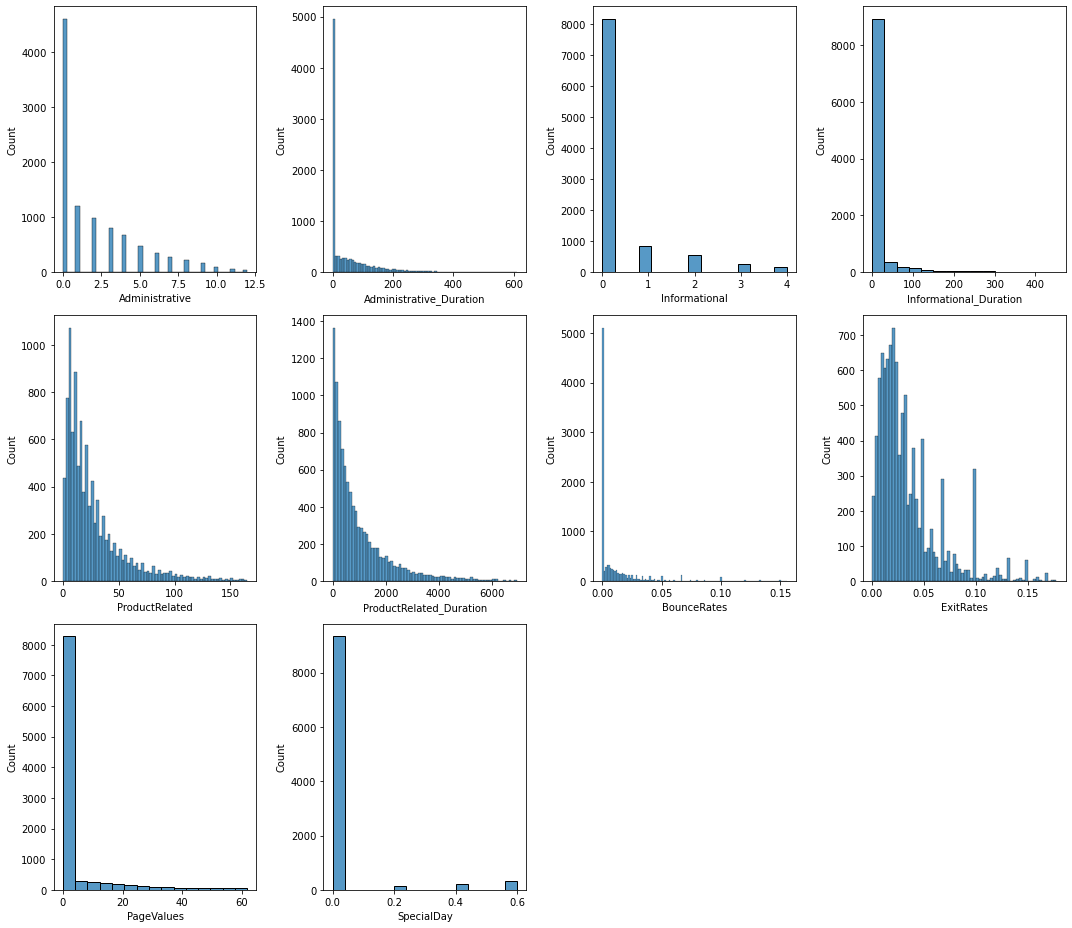

In [75]:
fig = plt.figure(figsize=(15, 13))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 4, i+1) # kita set posisi plotnya di layout
    sns.histplot(data=df_ol_shop_2_no_outlier, x=nums[i]) # 
    plt.tight_layout()

##### Log Transformation

In [73]:
df_ol_shop_2_log_transformation = df_ol_shop_2_no_outlier.copy()

df_ol_shop_2_log_transformation

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,z_scores
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,1.268054
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,2.134590
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0.702302
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False,0.702302
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False,1.693186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False,0.469915
12201,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False,0.702302
12202,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False,1.391338
12203,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False,0.498791


In [74]:
nums_log = []
for col in nums:
    log_name_colum = 'log_' + col
    nums_log.append(log_name_colum)
    # print(log_name_colum)
    df_ol_shop_2_log_transformation[log_name_colum] = np.log(df_ol_shop_2_log_transformation[col])
    df_ol_shop_2_log_transformation = df_ol_shop_2_log_transformation.drop(columns=col)

print(nums_log)
df_ol_shop_2_log_transformation


['log_Administrative', 'log_Administrative_Duration', 'log_Informational', 'log_Informational_Duration', 'log_ProductRelated', 'log_ProductRelated_Duration', 'log_BounceRates', 'log_ExitRates', 'log_PageValues', 'log_SpecialDay']


/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/array

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,z_scores,log_Administrative,log_Administrative_Duration,log_Informational,log_Informational_Duration,log_ProductRelated,log_ProductRelated_Duration,log_BounceRates,log_ExitRates,log_PageValues,log_SpecialDay
1,Feb,2,2,1,2,Returning_Visitor,False,False,1.268054,-inf,-inf,-inf,-inf,0.693147,4.158883,-inf,-2.302585,-inf,-inf
3,Feb,3,2,2,4,Returning_Visitor,False,False,2.134590,-inf,-inf,-inf,-inf,0.693147,0.980829,-2.995732,-1.966113,-inf,-inf
4,Feb,3,3,1,4,Returning_Visitor,True,False,0.702302,-inf,-inf,-inf,-inf,2.302585,6.441744,-3.912023,-2.995732,-inf,-inf
5,Feb,2,2,1,3,Returning_Visitor,False,False,0.702302,-inf,-inf,-inf,-inf,2.944439,5.038359,-4.148412,-3.706579,-inf,-inf
9,Feb,2,4,1,2,Returning_Visitor,False,False,1.693186,-inf,-inf,-inf,-inf,1.098612,6.603944,-inf,-3.806662,-inf,-0.916291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,Dec,4,6,1,1,Returning_Visitor,True,False,0.469915,1.098612,4.976734,-inf,-inf,3.970292,7.486497,-4.941642,-3.539404,2.50485,-inf
12201,Nov,3,2,1,8,Returning_Visitor,True,False,0.702302,-inf,-inf,-inf,-inf,1.609438,6.143649,-inf,-3.847484,-inf,-inf
12202,Nov,3,2,1,13,Returning_Visitor,True,False,1.391338,-inf,-inf,-inf,-inf,1.791759,5.216294,-2.484907,-2.445686,-inf,-inf
12203,Nov,2,2,3,11,Returning_Visitor,False,False,0.498791,1.386294,4.317488,-inf,-inf,2.708050,5.846439,-inf,-3.860730,-inf,-inf


##### Data sebaran sesudah dilakukan Log transformation

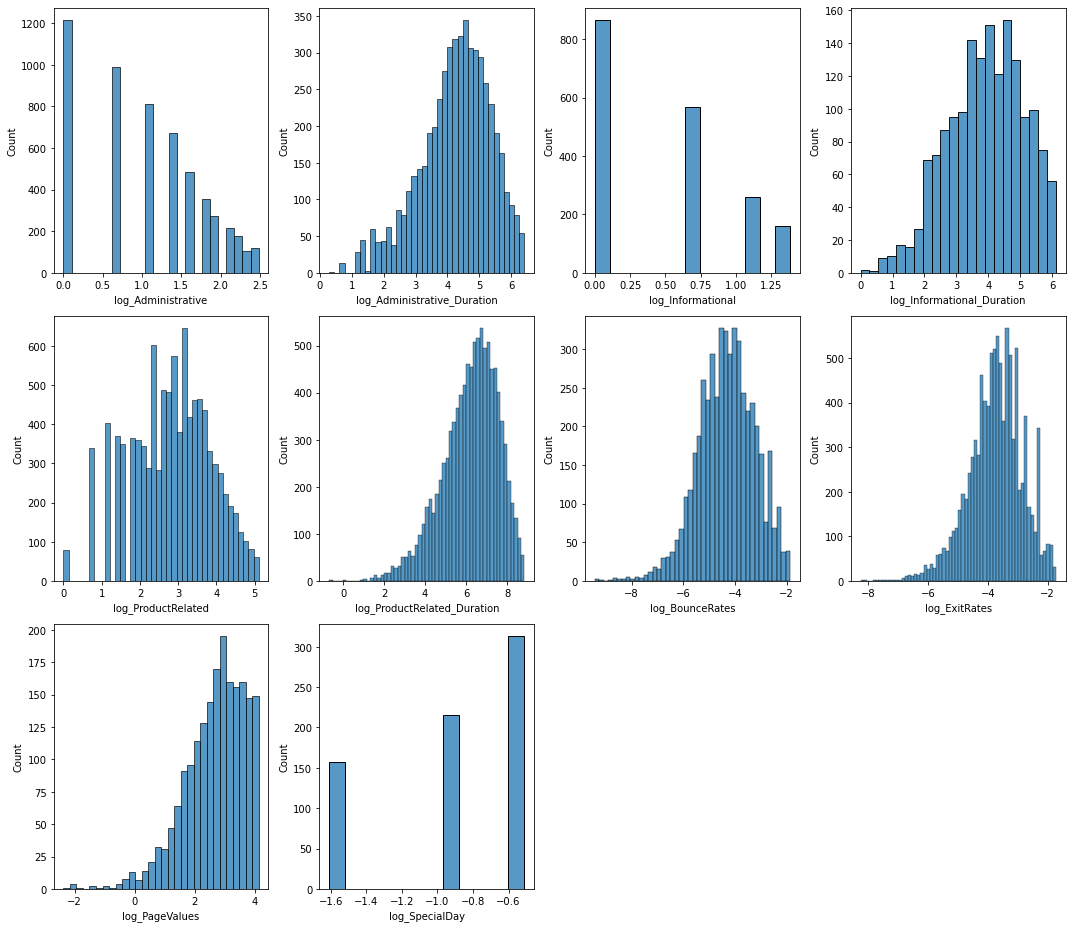

In [76]:
fig = plt.figure(figsize=(15, 13))
for i in range(0, len(nums_log)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 4, i+1) # kita set posisi plotnya di layout
    sns.histplot(data=df_ol_shop_2_log_transformation, x=nums_log[i]) # 
    plt.tight_layout()

In [81]:
print(len(nums))
print(len(nums_log))

10
10


#### Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Log Transformation

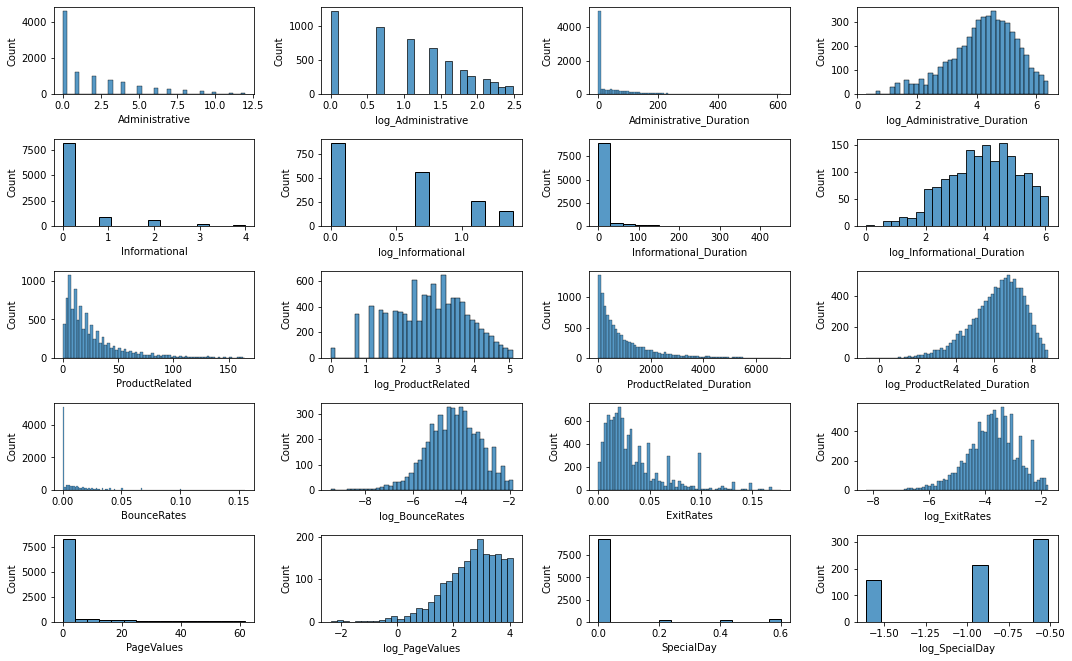

In [101]:
# nums = ['Administrative', 'Administrative_Duration', 'Informational',
#        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
#        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

fig = plt.figure(figsize=(15, 18))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.histplot(data=df_ol_shop_2_no_outlier, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.histplot(data=df_ol_shop_2_log_transformation, x=nums_log[i])

    plt.tight_layout()

#### E. Feature encoding

In [149]:
# cats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 
#         'VisitorType', 'Weekend', 'Revenue']
df_ol_shop_2_feature_encoding = df_ol_shop_2_log_transformation.copy()
df_ol_shop_2_feature_encoding

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,z_scores,log_Administrative,log_Administrative_Duration,log_Informational,log_Informational_Duration,log_ProductRelated,log_ProductRelated_Duration,log_BounceRates,log_ExitRates,log_PageValues,log_SpecialDay
1,Feb,2,2,1,2,Returning_Visitor,False,False,1.268054,-inf,-inf,-inf,-inf,0.693147,4.158883,-inf,-2.302585,-inf,-inf
3,Feb,3,2,2,4,Returning_Visitor,False,False,2.134590,-inf,-inf,-inf,-inf,0.693147,0.980829,-2.995732,-1.966113,-inf,-inf
4,Feb,3,3,1,4,Returning_Visitor,True,False,0.702302,-inf,-inf,-inf,-inf,2.302585,6.441744,-3.912023,-2.995732,-inf,-inf
5,Feb,2,2,1,3,Returning_Visitor,False,False,0.702302,-inf,-inf,-inf,-inf,2.944439,5.038359,-4.148412,-3.706579,-inf,-inf
9,Feb,2,4,1,2,Returning_Visitor,False,False,1.693186,-inf,-inf,-inf,-inf,1.098612,6.603944,-inf,-3.806662,-inf,-0.916291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,Dec,4,6,1,1,Returning_Visitor,True,False,0.469915,1.098612,4.976734,-inf,-inf,3.970292,7.486497,-4.941642,-3.539404,2.50485,-inf
12201,Nov,3,2,1,8,Returning_Visitor,True,False,0.702302,-inf,-inf,-inf,-inf,1.609438,6.143649,-inf,-3.847484,-inf,-inf
12202,Nov,3,2,1,13,Returning_Visitor,True,False,1.391338,-inf,-inf,-inf,-inf,1.791759,5.216294,-2.484907,-2.445686,-inf,-inf
12203,Nov,2,2,3,11,Returning_Visitor,False,False,0.498791,1.386294,4.317488,-inf,-inf,2.708050,5.846439,-inf,-3.860730,-inf,-inf


##### Label Encoding untuk Fitur Kategorikal

In [145]:
for col in cats:
    print('column:', col, df_ol_shop_2_feature_encoding[col].value_counts())
    
# print(df_ol_shop_2_feature_encoding['VisitorType'].unique())
# print(df_ol_shop_2_feature_encoding['VisitorType'].unique())
# print(df_ol_shop_2_feature_encoding['VisitorType'].unique())
# print(df_ol_shop_2_feature_encoding['Weekend'].unique())
# print(df_ol_shop_2_feature_encoding['Month'].unique())

column: OperatingSystems 2    5388
1    2112
3    2038
4     408
8      52
6      12
5       6
7       4
Name: OperatingSystems, dtype: int64
column: Browser 2     6438
1     2016
4      619
5      387
6      138
10     133
8      109
3       84
7       42
13      37
12      10
11       6
9        1
Name: Browser, dtype: int64
column: Region 1    3876
3    1959
4     954
2     923
6     666
7     614
9     406
8     369
5     253
Name: Region, dtype: int64
column: TrafficType 2     3219
1     1973
3     1665
4      862
13     540
10     387
6      361
8      294
5      231
11     207
20     148
7       36
9       34
15      27
19      14
14      11
18       8
16       2
12       1
Name: TrafficType, dtype: int64
column: Month May     2512
Nov     2426
Mar     1645
Dec     1457
Oct      472
Sep      390
Jul      375
Aug      373
June     241
Feb      129
Name: Month, dtype: int64
column: VisitorType Returning_Visitor    8446
New_Visitor          1519
Other                  55
Name: Visi

In [150]:
mapping_visitor_type = {
    'Returning_Visitor': 0,
    'New_Visitor': 1,
    'Other': 2,
}

mapping_weekend = {
    False: 0,
    True: 1
}

mapping_month = {
    "Jan": 1,
    "Feb": 2, 
    "Mar": 3, 
    "Apr": 4, 
    "May": 5, 
    "June": 6, 
    "Jul": 7, 
    "Aug": 8, 
    "Sep": 9, 
    "Oct": 10, 
    "Nov": 11, 
    "Dec": 12
}


def map_operating_system_type(data):
    if(data['OperatingSystems'] == 1):
        return 0
    elif(data['OperatingSystems'] == 3):  
        return 1
    elif(data['OperatingSystems'] == 4):  
        return 2
    else:
        return 3

def map_browser_type(data):
    if(data['Browser'] == 1):
        return 0
    elif(data['Browser'] == 4):  
        return 1
    elif(data['Browser'] == 5):  
        return 2
    elif(data['Browser'] == 6):  
        return 3
    elif(data['Browser'] == 10):  
        return 4
    elif(data['Browser'] == 8):  
        return 5
    elif(data['Browser'] == 3):  
        return 6
    elif(data['Browser'] == 7):  
        return 7
    elif(data['Browser'] == 13):  
        return 8
    else:
        return 9


def map_traffic_type(data):
    if(data['TrafficType'] == 1):
        return 0
    elif(data['TrafficType'] == 3):  
        return 1
    elif(data['TrafficType'] == 4):  
        return 2
    elif(data['TrafficType'] == 13):  
        return 3
    elif(data['TrafficType'] == 10):  
        return 4
    elif(data['TrafficType'] == 6):  
        return 5
    elif(data['TrafficType'] == 8):  
        return 6
    elif(data['TrafficType'] == 5):  
        return 7
    elif(data['TrafficType'] == 11):  
        return 8
    elif(data['TrafficType'] == 20):  
        return 9
    else:
        return 10


df_ol_shop_2_feature_encoding['VisitorType'] = df_ol_shop_2_feature_encoding['VisitorType'].map(mapping_visitor_type)
df_ol_shop_2_feature_encoding['Weekend'] = df_ol_shop_2_feature_encoding['Weekend'].map(mapping_weekend)
df_ol_shop_2_feature_encoding['Month'] = df_ol_shop_2_feature_encoding['Month'].map(mapping_month)
df_ol_shop_2_feature_encoding['OperatingSystems'] = df_ol_shop_2_feature_encoding.apply(lambda x: map_operating_system_type(x), axis=1)
df_ol_shop_2_feature_encoding['Browser'] = df_ol_shop_2_feature_encoding.apply(lambda x: map_browser_type(x), axis=1)
df_ol_shop_2_feature_encoding['TrafficType'] = df_ol_shop_2_feature_encoding.apply(lambda x: map_traffic_type(x), axis=1)
df_ol_shop_2_feature_encoding

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,z_scores,log_Administrative,log_Administrative_Duration,log_Informational,log_Informational_Duration,log_ProductRelated,log_ProductRelated_Duration,log_BounceRates,log_ExitRates,log_PageValues,log_SpecialDay
1,2,3,9,1,10,0,0,False,1.268054,-inf,-inf,-inf,-inf,0.693147,4.158883,-inf,-2.302585,-inf,-inf
3,2,1,9,2,2,0,0,False,2.134590,-inf,-inf,-inf,-inf,0.693147,0.980829,-2.995732,-1.966113,-inf,-inf
4,2,1,6,1,2,0,1,False,0.702302,-inf,-inf,-inf,-inf,2.302585,6.441744,-3.912023,-2.995732,-inf,-inf
5,2,3,9,1,1,0,0,False,0.702302,-inf,-inf,-inf,-inf,2.944439,5.038359,-4.148412,-3.706579,-inf,-inf
9,2,3,1,1,10,0,0,False,1.693186,-inf,-inf,-inf,-inf,1.098612,6.603944,-inf,-3.806662,-inf,-0.916291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,12,2,3,1,0,0,1,False,0.469915,1.098612,4.976734,-inf,-inf,3.970292,7.486497,-4.941642,-3.539404,2.50485,-inf
12201,11,1,9,1,6,0,1,False,0.702302,-inf,-inf,-inf,-inf,1.609438,6.143649,-inf,-3.847484,-inf,-inf
12202,11,1,9,1,3,0,1,False,1.391338,-inf,-inf,-inf,-inf,1.791759,5.216294,-2.484907,-2.445686,-inf,-inf
12203,11,3,9,3,8,0,0,False,0.498791,1.386294,4.317488,-inf,-inf,2.708050,5.846439,-inf,-3.860730,-inf,-inf


In [148]:
df_ol_shop_2_feature_encoding['OperatingSystems'].value_counts()

2    5870
0    2112
1    2038
Name: OperatingSystems, dtype: int64